# Lead Score Case Study

## Problem Statement:
An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses.Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone. 

We need to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.


### Part 1 : Reading the data

<br>

#### Part 1.1 : Importing the libraries


In [1]:
##importing the essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##Ignore warnings
import warnings
warnings.filterwarnings("ignore")

##setting the max column limit
pd.set_option("max_columns",500)


<br>

#### Part 1.2 : Reading the data

In [2]:
##Reading the dataset
df_1 = pd.read_csv("Leads.csv")

##displaying the top 5 rows in the dataset
df_1.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


<br>

#### Part 1.3 : Getting the dimensions of the data

In [530]:
##Checking the shape of the dataframe
df_1.shape

(9240, 37)

In [531]:
##Checking the datatypes of the column
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

From the above we get that for some data is missing for certain columns. lets find out and clean the data in the EDA Section.

<br>

### Part 2 : EDA

In [532]:
##Checking the percentage of null values
round(100*(df_1.isnull().sum()/len(df_1)),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

From the above data we can see that for some of the columns there are approximately 45-50 % of null values. Since these columns dont add any value in the given data. lets drop the below coloumns and then analyze the dataset again

<br>

Columns : 
- Asymmetrique Activity Index
- Asymmetrique Profile Index
- Asymmetrique Activity Score
- Asymmetrique Profile Score
- Lead Quality

<br>

#### Part 2.1 : Dropping the columns having more than 45% missing values

In [533]:
##Dropping variables having around 50% of missing values
df_1 = df_1.drop(["Asymmetrique Activity Index","Asymmetrique Profile Index","Asymmetrique Activity Score","Asymmetrique Profile Score","Lead Quality"],axis=1)

## Displaying the dataset after deletion of the columns
df_1.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,No,No,Select,Select,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,Select,Select,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Potential Lead,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,Select,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Select,Mumbai,No,No,Modified


In [534]:
##checking the shape of dataset after deletion of rows
df_1.shape

(9240, 32)

We have dropped the column and lets check if the data has null values or not

In [535]:
##Checking the % of null values

round(100*(df_1.isnull().sum()/len(df_1)),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

from the above data, we can see that the max null count of the data is around 36.29% which can be considered Ok. Now lets check the categorical values in the data and see the data behaviour in those columns

<br>

#### Part 2.2 :  Univariate Analysis(Categorical Columns)

<br>



In [536]:
##displaying the columns in the dataframe
df_1.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

From the columns we can see that `Do Not Mail`, `Do not Call` contain the values yes or no. Let's check the data distribution in those columns

<br>



In [537]:
## checking the 'Do Not Email' column
df_1['Do Not Email'].value_counts(normalize=True)

No     0.920563
Yes    0.079437
Name: Do Not Email, dtype: float64

From this column have around 92% of "No" categories meaning that the data is highly skewed,so we can drop the `Do Not Email` column safely.

<br>



In [538]:
## Dropping the Do Not Email columns
df_1 = df_1.drop("Do Not Email",axis=1)

In [539]:
## Checking the dataframe after deletion of the "Do Not Email" Column
df_1.shape

(9240, 31)

Now that the `Do Not Email` column has been deleted, lets check the same for the `Do Not Call` column

<br>


In [540]:
## Checking the "Do Not Call" variable
df_1["Do Not Call"].value_counts()

No     9238
Yes       2
Name: Do Not Call, dtype: int64

From the above data we can notice that `No` have very high values compared to `Yes` meaning that the data might be highly skewed. so we can remove this column too

<br>


In [541]:
##"Do Not Call" variable is also highly skewed ...Dropping this variable too
df_1 = df_1.drop("Do Not Call",axis=1)

In [542]:
## checking the size of the dataframe after deletion of the column
df_1.shape

(9240, 30)

Now that we have deleted the two columns that are highly skewed, lets check the remaining column data.

<br>



In [543]:
## Checking the columns
df_1.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'Country', 'Specialization',
       'How did you hear about X Education', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

Now that we have removed the columns like `Do not call` and `Do not Email`. Let's check the data for the `Lead Origin` column

<br>


In [544]:
## Checking the data distribution for the 'Lead Origin' Column
df_1['Lead Origin'].value_counts(normalize=True)

Landing Page Submission    0.528788
API                        0.387446
Lead Add Form              0.077706
Lead Import                0.005952
Quick Add Form             0.000108
Name: Lead Origin, dtype: float64

while making dummy variable we can drop `Lead Add Form`,`Lead Import`,`Quick Add Form` as these values contributes to a very less percentage. Instead let's bucket these three into the "Others" category

In [545]:
###Performing bucketing
def assign(x):
    check = ["Lead Add Form","Lead Import","Quick Add Form"]
    if x in check :
        return "Others"
    else:
        return x

df_1["Lead Origin"] = pd.DataFrame(map(assign,df_1["Lead Origin"]))

In [546]:
###Checking the value count of "Lead Origin" after bucketing
df_1["Lead Origin"].value_counts(normalize=True)

Landing Page Submission    0.528788
API                        0.387446
Others                     0.083766
Name: Lead Origin, dtype: float64

Now that we have bucketed the data, lets check the Values distribution for the `Lead Source` columns

<br>


In [547]:
#### Checking the Data Distribution in the 'Lead Source' Column
df_1["Lead Source"].value_counts(normalize=True)

Google               0.311604
Direct Traffic       0.276293
Olark Chat           0.190678
Organic Search       0.125380
Reference            0.058018
Welingak Website     0.015428
Referral Sites       0.013581
Facebook             0.005976
bing                 0.000652
google               0.000543
Click2call           0.000435
Live Chat            0.000217
Press_Release        0.000217
Social Media         0.000217
NC_EDM               0.000109
Pay per Click Ads    0.000109
blog                 0.000109
youtubechannel       0.000109
WeLearn              0.000109
welearnblog_Home     0.000109
testone              0.000109
Name: Lead Source, dtype: float64

Apart from the first four rows, the other seems to have very less. Let's cap the data to the `Other` category so that it will be easy for the analyzation.

In [548]:
####Performing bucketing on the "Lead Source" column
def assign(x):
    check = ["Welingak Website","Referral Sites","Facebook","bing","google","Click2call","Live Chat","Press_Release","Social Media","blog","welearnblog_Home","WeLearn","Pay per Click Ads","youtubechannel","testone","NC_EDM"]
    if x in check:
        return "Others"
    else:
        return x

df_1["Lead Source"] = pd.DataFrame(map(assign,df_1["Lead Source"]))

In [549]:
##checking the value count of "Lead Source" after bucketing
df_1["Lead Source"].value_counts(normalize=True)

Google            0.311604
Direct Traffic    0.276293
Olark Chat        0.190678
Organic Search    0.125380
Reference         0.058018
Others            0.038027
Name: Lead Source, dtype: float64

After the conversion of the data, it seems that the other Category has some value with the 3.8% distribution of values unlike the previous data. Let's analyze the data for the `Converted` category data.

<br>



In [550]:
## Checking the data in the 'Converted' Column(Target variable)
df_1["Converted"].value_counts(normalize=True)

0    0.61461
1    0.38539
Name: Converted, dtype: float64

Here the data seems pretty much normalized and we need not do any variations. let's check the another column `Last Activity`

<br>



In [551]:
###Last Activity 
df_1["Last Activity"].value_counts(normalize=True)

Email Opened                    0.376163
SMS Sent                        0.300427
Olark Chat Conversation         0.106490
Page Visited on Website         0.070045
Converted to Lead               0.046843
Email Bounced                   0.035679
Email Link Clicked              0.029222
Form Submitted on Website       0.012696
Unreachable                     0.010178
Unsubscribed                    0.006676
Had a Phone Conversation        0.003283
Approached upfront              0.000985
View in browser link Clicked    0.000657
Email Received                  0.000219
Email Marked Spam               0.000219
Visited Booth in Tradeshow      0.000109
Resubscribed to emails          0.000109
Name: Last Activity, dtype: float64

Seems like the data is also a bit confusing while we normalized. Lets perform the bucketting for some columns and label them as the `Others`

In [552]:
##Perform bucketing on "Last Activity"
def assign(x):
    check = ["Converted to Lead","Email Bounced","Email Link Clicked","Form Submitted on Website","Unreachable","Unsubscribed","Had a Phone Conversation","Approached upfront","View in browser link Clicked","Email Received","Email Marked Spam","Resubscribed to emails","Visited Booth in Tradeshow"]
    if x in check:
        return "Others"
    else:
        return x

df_1["Last Activity"] = pd.DataFrame(map(assign,df_1["Last Activity"]))

In [553]:
###Checking the value count on "Last Activity "
df_1["Last Activity"].value_counts(normalize=True)

Email Opened               0.376163
SMS Sent                   0.300427
Others                     0.146875
Olark Chat Conversation    0.106490
Page Visited on Website    0.070045
Name: Last Activity, dtype: float64

Now the data is organized in perfect manner. Let's check the `Country` column

<br>


In [554]:
##Checking the data behaviour in the "Country" Column
df_1["Country"].value_counts(normalize=True)

India                   0.957663
United States           0.010178
United Arab Emirates    0.007818
Singapore               0.003540
Saudi Arabia            0.003098
United Kingdom          0.002213
Australia               0.001918
Qatar                   0.001475
Bahrain                 0.001033
Hong Kong               0.001033
Oman                    0.000885
France                  0.000885
unknown                 0.000738
Nigeria                 0.000590
Kuwait                  0.000590
Germany                 0.000590
Canada                  0.000590
South Africa            0.000590
Sweden                  0.000443
Philippines             0.000295
Bangladesh              0.000295
Asia/Pacific Region     0.000295
China                   0.000295
Uganda                  0.000295
Ghana                   0.000295
Netherlands             0.000295
Belgium                 0.000295
Italy                   0.000295
Malaysia                0.000148
Sri Lanka               0.000148
Russia    

Since it contains almost 95% of values ..so we can replace the null values in this column by its mode i,e `India`. Before replacing the data, let's check the empty data percentage in this column.

In [555]:
## Checking the Null Percentile in the country column
round(100*(df_1["Country"].isnull().sum()/len(df_1)),2)

26.63

Seems like the null values are less and we can impute them into the `India` column. So. let's move ahead and impute the data.

In [556]:
##Imputing this 27% of missing values with mode (India)
df_1["Country"].fillna("India",inplace=True)

In [557]:
###Chceking the null values again
df_1["Country"].isnull().sum()

0

Now that we have removed the empty values from the `Country` Column, lets check the data behaviour in the `Specialization` column

<br>


In [558]:
##Checking the data behaviour in the "Specialization" column
df_1["Specialization"].value_counts(normalize=True)

Select                               0.248911
Finance Management                   0.125096
Human Resource Management            0.108690
Marketing Management                 0.107408
Operations Management                0.064471
Business Administration              0.051653
IT Projects Management               0.046911
Supply Chain Management              0.044732
Banking, Investment And Insurance    0.043322
Media and Advertising                0.026019
Travel and Tourism                   0.026019
International Business               0.022815
Healthcare Management                0.020379
Hospitality Management               0.014612
E-COMMERCE                           0.014355
Retail Management                    0.012817
Rural and Agribusiness               0.009357
E-Business                           0.007306
Services Excellence                  0.005127
Name: Specialization, dtype: float64

In [559]:
##Since some of the data in column contains the NaN or null values, lets replace them with others
df_1["Specialization"] = df_1["Specialization"].replace(np.nan,"Others")

In [560]:
## Checking the data behaviour after replacing it with "other" 
df_1["Specialization"].value_counts(normalize=True)

Select                               0.210173
Others                               0.155628
Finance Management                   0.105628
Human Resource Management            0.091775
Marketing Management                 0.090693
Operations Management                0.054437
Business Administration              0.043615
IT Projects Management               0.039610
Supply Chain Management              0.037771
Banking, Investment And Insurance    0.036580
Media and Advertising                0.021970
Travel and Tourism                   0.021970
International Business               0.019264
Healthcare Management                0.017208
Hospitality Management               0.012338
E-COMMERCE                           0.012121
Retail Management                    0.010823
Rural and Agribusiness               0.007900
E-Business                           0.006169
Services Excellence                  0.004329
Name: Specialization, dtype: float64

So many specializations may actually confuse the resource, let's bucket them to the `Other` category.

In [561]:
##Perform bucketing on "Specialization"
def assign(x):
    check = ["Services Excellence","E-Business","Rural and Agribusiness","Retail Management","E-COMMERCE","Hospitality Management","Healthcare Management","International Business","Travel and Tourism","Media and Advertising","Banking, Investment And Insurance","Supply Chain Management","IT Projects Management","Business Administration","Operations Management"]
    if x in check:
        return "Others"
    else:
        return x
    
df_1["Specialization"]  = pd.DataFrame(map(assign,df_1["Specialization"]))   

In [562]:
## Checking the null data in the column
df_1["Specialization"].isnull().sum()

0

Now that we have capped the data, let's check the data normalization again.

In [563]:
##Checking the data behaviour in the "Specialization" column
df_1["Specialization"].value_counts(normalize=True)

Others                       0.501732
Select                       0.210173
Finance Management           0.105628
Human Resource Management    0.091775
Marketing Management         0.090693
Name: Specialization, dtype: float64

 There are chances that values `Select` is actually a null value, since in the drop down if user has not selected any value and submitted the form then he did not select any specialization and it is an actual null value. Let's replace the `Select` with the null values

In [564]:
## Replacing the select with Null values
df_1["Specialization"] = df_1["Specialization"].replace("Select",np.nan)

In [565]:
##Checking the missing value % again in "Specialization"
df_1.isnull().sum()/len(df_1)

Prospect ID                                      0.000000
Lead Number                                      0.000000
Lead Origin                                      0.000000
Lead Source                                      0.003896
Converted                                        0.000000
TotalVisits                                      0.014827
Total Time Spent on Website                      0.000000
Page Views Per Visit                             0.014827
Last Activity                                    0.011147
Country                                          0.000000
Specialization                                   0.210173
How did you hear about X Education               0.238853
What is your current occupation                  0.291126
What matters most to you in choosing a course    0.293182
Search                                           0.000000
Magazine                                         0.000000
Newspaper Article                                0.000000
X Education Fo

So now the `Specialization` variable have almost 37% of missing values

<br>


In [566]:
#checking the columns
df_1.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'Country', 'Specialization',
       'How did you hear about X Education', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [567]:
## Checking the data behaviour in "How did you hear about X Education"
df_1["How did you hear about X Education"].value_counts(normalize=True)

Select                   0.717048
Online Search            0.114887
Word Of Mouth            0.049481
Student of SomeSchool    0.044078
Other                    0.026447
Multiple Sources         0.021612
Advertisements           0.009953
Social Media             0.009527
Email                    0.003697
SMS                      0.003270
Name: How did you hear about X Education, dtype: float64

Again, the value `Select` is actually a null value, since in the drop down if user has not selected any value and submitted the form then he did not select any specialization and it is an actual null value. Let's replace the `Select` with the null values

In [568]:
##Replace the "select" option by null values
df_1["How did you hear about X Education"] = df_1["How did you hear about X Education"].replace("Select",np.nan)

In [569]:
#Checking the columns with high null values
df_1.isnull().sum()/len(df_1)

Prospect ID                                      0.000000
Lead Number                                      0.000000
Lead Origin                                      0.000000
Lead Source                                      0.003896
Converted                                        0.000000
TotalVisits                                      0.014827
Total Time Spent on Website                      0.000000
Page Views Per Visit                             0.014827
Last Activity                                    0.011147
Country                                          0.000000
Specialization                                   0.210173
How did you hear about X Education               0.784632
What is your current occupation                  0.291126
What matters most to you in choosing a course    0.293182
Search                                           0.000000
Magazine                                         0.000000
Newspaper Article                                0.000000
X Education Fo

In [570]:
##Dropping the "How did you hear about X Education" variable (since it has almost 80% of missing values)
df_1 = df_1.drop("How did you hear about X Education",axis=1)

In [571]:
## Checking the shape of Dataframe
df_1.shape

(9240, 29)

In [572]:
## Checking the columns again
df_1.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [573]:
## Checking the data distribution for "What is your current occupation" column
df_1["What is your current occupation"].value_counts(normalize=True)

Unemployed              0.854962
Working Professional    0.107786
Student                 0.032061
Other                   0.002443
Housewife               0.001527
Businessman             0.001221
Name: What is your current occupation, dtype: float64

We can replace the 30% missing values in this column by its mode("Unemployed")

In [574]:
##Replacing the values with NaN
df_1["What is your current occupation"] = df_1["What is your current occupation"].replace(np.nan,"Unemployed")

In [575]:
## Checking the data distribution for "What is your current occupation" column
df_1["What is your current occupation"].value_counts(normalize=True)

Unemployed              0.897186
Working Professional    0.076407
Student                 0.022727
Other                   0.001732
Housewife               0.001082
Businessman             0.000866
Name: What is your current occupation, dtype: float64

In [576]:
###checking the null values again
df_1.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                             0
Specialization                                   1942
What is your current occupation                     0
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                                           0
Digital Advertisement       

In [577]:
## Checking the data distribution for "What matters most to you in choosing a course" Column
df_1["What matters most to you in choosing a course"].value_counts(normalize=True)

Better Career Prospects      0.999541
Flexibility & Convenience    0.000306
Other                        0.000153
Name: What matters most to you in choosing a course, dtype: float64

From the above data we can combine the `Flexibility & Convenience` with `Other` for better data understanding

In [578]:
## Creating a function
def assign(x):
    check = ["Flexibility & Convenience","Other"]
    if x in check:
        return "Others"
    else:
        return x
df_1["What matters most to you in choosing a course"] = pd.DataFrame(map(assign,df_1["What matters most to you in choosing a course"]))

In [579]:
## Checking the data distribution for "What matters most to you in choosing a course" column
df_1["What matters most to you in choosing a course"].value_counts(normalize=True)

Better Career Prospects    0.999541
Others                     0.000459
Name: What matters most to you in choosing a course, dtype: float64

In [580]:
###Replacing the null values in "What matters most to you in choosing a course" by its mode
df_1["What matters most to you in choosing a course"] = df_1["What matters most to you in choosing a course"].replace(np.nan,"Better Career Prospects")

In [581]:
#checking the null values in all the columns
df_1.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                             0
Specialization                                   1942
What is your current occupation                     0
What matters most to you in choosing a course       0
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                                           0
Digital Advertisement       

In [582]:
## Checking the data distribution for "Search" Column
df_1["Search"].value_counts(normalize=True)

No     0.998485
Yes    0.001515
Name: Search, dtype: float64

From this column have around 99% of "No" categories meaning that the data is highly skewed,so we can drop the `Search` column safely.

In [583]:
## Dropping this column
df_1.drop("Search",axis=1,inplace=True)

In [584]:
df_1.shape

(9240, 28)

In [585]:
#Checking the columns 
df_1.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [586]:
##Checking the data distribution for "Magazine" column
df_1["Magazine"].value_counts(normalize=True)

No    1.0
Name: Magazine, dtype: float64

From the above data we can see that we have only one category and in the real world scenario we cannot have such type of data where the value will always be true. Hence we can drop the column as we dont get any insights from this column

In [587]:
# "Magazine" is completely skewed having only 1 category...so we won't have any insight about lead from this variable
df_1.drop("Magazine",axis=1,inplace=True)

In [588]:
df_1.shape

(9240, 27)

In [589]:
##Checking the data distribution for "Newspaper Article" column
df_1["Newspaper Article"].value_counts(normalize=True)

No     0.999784
Yes    0.000216
Name: Newspaper Article, dtype: float64

From the above data we can see that majority of the column values are `No` values, meaning that the data is skwed. Hence we can drop the column as we dont get any insights from this column

In [590]:
###dropping the "Newspaper Article" column
df_1.drop("Newspaper Article",axis=1,inplace=True)

In [591]:
##Checking the data distribution for "X Education Forums"
df_1["X Education Forums"].value_counts(normalize=True)

No     0.999892
Yes    0.000108
Name: X Education Forums, dtype: float64

From the above data we can see that majority of the column values are `No` values, meaning that the data is skwed. Hence we can drop the column as we dont get any insights from this column

In [592]:
##Dropping this variable also
df_1.drop("X Education Forums",axis=1,inplace=True)

In [593]:
#checking the shape of the dataframe
df_1.shape

(9240, 25)

In [594]:
##Checking the data distribution for "Newspaper"
df_1["Newspaper"].value_counts(normalize=True)

No     0.999892
Yes    0.000108
Name: Newspaper, dtype: float64

From the above data we can see that majority of the column values are `No` values, meaning that the data is skwed. Hence we can drop the column as we dont get any insights from this column

In [595]:
##Dropping "Newspaper" column 
df_1.drop("Newspaper",axis=1,inplace=True)

In [596]:
##Checking the data distribution for "Digital Advertisement"
df_1["Digital Advertisement"].value_counts(normalize=True)

No     0.999567
Yes    0.000433
Name: Digital Advertisement, dtype: float64

From the above data we can see that majority of the column values are `No` values, meaning that the data is skwed. Hence we can drop the column as we dont get any insights from this column

In [597]:
##Dropping "Digital Advertisement" column
df_1.drop("Digital Advertisement",axis=1,inplace=True)

In [598]:
#checking the shape of the dataframe
df_1.shape

(9240, 23)

In [599]:
##Checking the data distribution for "Through Recommendations" Column
df_1["Through Recommendations"].value_counts(normalize=True)

No     0.999242
Yes    0.000758
Name: Through Recommendations, dtype: float64

From the above data we can see that majority of the column values are `No` values, meaning that the data is skwed. Hence we can drop the column as we dont get any insights from this column

In [600]:
##Dropping "Through Recommendations" column
df_1.drop("Through Recommendations",axis=1,inplace=True)

In [601]:
##Checking the data distribution for "Receive More Updates About Our Courses" Column
df_1["Receive More Updates About Our Courses"].value_counts(normalize=True)

No    1.0
Name: Receive More Updates About Our Courses, dtype: float64

From the above data we can see that we have only one category and in the real world scenario we cannot have such type of data where the value will always be true. Hence we can drop the column as we dont get any insights from this column

In [602]:
##Dropping "Receive More Updates About Our Courses" column
df_1.drop("Receive More Updates About Our Courses",axis=1,inplace=True)

In [603]:
#checking the shape of the dataframe
df_1.shape

(9240, 21)

In [604]:
##Checking the data distribution for "Tags" Column
df_1["Tags"].value_counts(normalize=True)

Will revert after reading the email                  0.351962
Ringing                                              0.204349
Interested in other courses                          0.087141
Already a student                                    0.078988
Closed by Horizzon                                   0.060812
switched off                                         0.040768
Busy                                                 0.031595
Lost to EINS                                         0.029727
Not doing further education                          0.024631
Interested  in full time MBA                         0.019874
Graduation in progress                               0.018855
invalid number                                       0.014099
Diploma holder (Not Eligible)                        0.010702
wrong number given                                   0.007984
opp hangup                                           0.005606
number not provided                                  0.004586
in touch

From the above data, we can see that the data is distributed equivocally. hence it will be better if we bucket some of them to `Others`

In [605]:
####Bucketing
def assign(x):
    check = ["Recognition issue (DEC approval)","University not recognized","Shall take in the next coming month","Lateral student","Interested in Next batch","In confusion whether part time or DLP","Still Thinking","Want to take admission but has financial problems","Lost to Others","in touch with EINS","number not provided","opp hangup","wrong number given","Diploma holder (Not Eligible)","invalid number","Graduation in progress","Interested  in full time MBA","Not doing further education","Lost to EINS","Busy"]
    if x in check:
        return "Others"
    else:
        return x
    
df_1["Tags"] = pd.DataFrame(map(assign,df_1["Tags"]))


In [606]:
##Checking the data distribution for "Tags" Column after normalization
df_1["Tags"].value_counts(normalize=True)

Will revert after reading the email    0.351962
Ringing                                0.204349
Others                                 0.175981
Interested in other courses            0.087141
Already a student                      0.078988
Closed by Horizzon                     0.060812
switched off                           0.040768
Name: Tags, dtype: float64

In [607]:
###Replacing the null values in "Tags" by mode
df_1["Tags"] =df_1["Tags"].replace(np.nan,"Will revert after reading the email")

In [608]:
#checking the null values
df_1.isnull().sum()/len(df_1)

Prospect ID                                      0.000000
Lead Number                                      0.000000
Lead Origin                                      0.000000
Lead Source                                      0.003896
Converted                                        0.000000
TotalVisits                                      0.014827
Total Time Spent on Website                      0.000000
Page Views Per Visit                             0.014827
Last Activity                                    0.011147
Country                                          0.000000
Specialization                                   0.210173
What is your current occupation                  0.000000
What matters most to you in choosing a course    0.000000
Tags                                             0.000000
Update me on Supply Chain Content                0.000000
Get updates on DM Content                        0.000000
Lead Profile                                     0.293182
City          

In [609]:
##Checking the data distribution for "Update me on Supply Chain Content" column
df_1["Update me on Supply Chain Content"].value_counts(normalize=True)

No    1.0
Name: Update me on Supply Chain Content, dtype: float64

From the above data we can see that we have only one category and in the real world scenario we cannot have such type of data where the value will always be true. Hence we can drop the column as we dont get any insights from this column

In [610]:
##Dropping the "Update me on Supply Chain Content" column as the data is highly skewed
df_1.drop("Update me on Supply Chain Content",axis=1,inplace=True)

In [611]:
##Checking the data distribution for "Get updates on DM Content" column
df_1["Get updates on DM Content"].value_counts(normalize=True)

No    1.0
Name: Get updates on DM Content, dtype: float64

From the above data we can see that we have only one category and in the real world scenario we cannot have such type of data where the value will always be true. Hence we can drop the column as we dont get any insights from this column

In [612]:
###Dropping the "Get updates on DM Content" (skewed)
df_1.drop("Get updates on DM Content",axis=1,inplace=True)

In [613]:
#checking the shape of dataframe after dropping
df_1.shape

(9240, 19)

In [614]:
##Checking the data distribution for "LeadProfile" column
df_1["Lead Profile"].value_counts(normalize=True)

Select                         0.634819
Potential Lead                 0.246976
Other Leads                    0.074567
Student of SomeSchool          0.036901
Lateral Student                0.003675
Dual Specialization Student    0.003062
Name: Lead Profile, dtype: float64

 There are chances that values `Select` is actually a null value, since in the drop down if user has not selected any value and submitted the form then he did not select any specialization and it is an actual null value. Let's replace the `Select` with the null values

In [615]:
##Replacing the "select" category by null values
df_1["Lead Profile"] = df_1["Lead Profile"].replace("Select",np.nan)

In [616]:
##Checking the data distribution for "LeadProfile" column
df_1["Lead Profile"].value_counts(normalize=True)

Potential Lead                 0.676310
Other Leads                    0.204193
Student of SomeSchool          0.101048
Lateral Student                0.010063
Dual Specialization Student    0.008386
Name: Lead Profile, dtype: float64

from the above we have deleted the type select as we have replaced with the null values.

In [617]:
#Checking the null values in the dataframe
df_1.isnull().sum()/len(df_1)

Prospect ID                                      0.000000
Lead Number                                      0.000000
Lead Origin                                      0.000000
Lead Source                                      0.003896
Converted                                        0.000000
TotalVisits                                      0.014827
Total Time Spent on Website                      0.000000
Page Views Per Visit                             0.014827
Last Activity                                    0.011147
Country                                          0.000000
Specialization                                   0.210173
What is your current occupation                  0.000000
What matters most to you in choosing a course    0.000000
Tags                                             0.000000
Lead Profile                                     0.741883
City                                             0.153680
I agree to pay the amount through cheque         0.000000
A free copy of

From the above data we can infer that the column `Lead Profile` has the high number of null values. Hence we can delete that column

In [618]:
##Dropping the "Lead Profile" column as it has 74% of missing values
df_1.drop("Lead Profile",axis=1,inplace=True)

In [619]:
##Checking the data distribution for "City" column
df_1["City"].value_counts(normalize=True)

Mumbai                         0.412020
Select                         0.287596
Thane & Outskirts              0.096164
Other Cities                   0.087724
Other Cities of Maharashtra    0.058440
Other Metro Cities             0.048593
Tier II Cities                 0.009463
Name: City, dtype: float64

 There are chances that values `Select` is actually a null value, since in the drop down if user has not selected any value and submitted the form then he did not select any specialization and it is an actual null value. Let's replace the `Select` with the null values

In [620]:
## Replacing 'select' with null values
df_1["City"] = df_1["City"].replace("Select",np.nan)

In [621]:
##Checking the data distribution for "City" column
df_1["City"].value_counts(normalize=True)

Mumbai                         0.578352
Thane & Outskirts              0.134985
Other Cities                   0.123138
Other Cities of Maharashtra    0.082032
Other Metro Cities             0.068210
Tier II Cities                 0.013283
Name: City, dtype: float64

Here we are not getting much inferences from the data. Hence we are proceeeding with the removal of the data.

In [622]:
##Dropping the "city" variable (contains skewed and missing)
df_1.drop("City",1,inplace=True)

In [623]:
##Checking the data distribution for "I agree to pay the amount through cheque"
df_1["I agree to pay the amount through cheque"].value_counts(normalize=True)

No    1.0
Name: I agree to pay the amount through cheque, dtype: float64

From the above data we can see that we have only one category and in the real world scenario we cannot have such type of data where the value will always be true. Hence we can drop the column as we dont get any insights from this column

In [624]:
##Dropping "I agree to pay the amount through cheque"(skewed)
df_1.drop("I agree to pay the amount through cheque",axis=1,inplace=True)

In [625]:
##Checking the data distribution for "A free copy of Mastering The Interview"
df_1["A free copy of Mastering The Interview"].value_counts(normalize=True)

No     0.687446
Yes    0.312554
Name: A free copy of Mastering The Interview, dtype: float64

The data is fine and need no modifications.

In [626]:
##Checking the data distribution for "Last Notable Activity "
df_1["Last Notable Activity"].value_counts(normalize=True)

Modified                        0.368723
Email Opened                    0.305952
SMS Sent                        0.235065
Page Visited on Website         0.034416
Olark Chat Conversation         0.019805
Email Link Clicked              0.018723
Email Bounced                   0.006494
Unsubscribed                    0.005087
Unreachable                     0.003463
Had a Phone Conversation        0.001515
Email Marked Spam               0.000216
Approached upfront              0.000108
Resubscribed to emails          0.000108
View in browser link Clicked    0.000108
Email Received                  0.000108
Form Submitted on Website       0.000108
Name: Last Notable Activity, dtype: float64

From the above data, we can see that the data is distributed equivocally. hence it will be better if we bucket some of them to `Others`

In [627]:
###Perform bucketing on "Last Notable Activity "column
def assign(x):
    check_list = ["Approached upfront","Resubscribed to emails","Form Submitted on Website","Email Received","View in browser link Clicked","Email Marked Spam","Had a Phone Conversation","Unreachable","Unsubscribed","Email Bounced","Email Link Clicked","Olark Chat Conversation"]
    if x in check_list:
        return "Others"
    else:
        return x
    
df_1["Last Notable Activity"] = pd.DataFrame(map(assign,df_1["Last Notable Activity"]))

In [628]:
##Checking the data distribution for "Last Notable Activity " after bucketting
df_1["Last Notable Activity"].value_counts(normalize=True)

Modified                   0.368723
Email Opened               0.305952
SMS Sent                   0.235065
Others                     0.055844
Page Visited on Website    0.034416
Name: Last Notable Activity, dtype: float64

In [629]:
###Checking the null values again
df_1.isnull().sum()/len(df_1)

Prospect ID                                      0.000000
Lead Number                                      0.000000
Lead Origin                                      0.000000
Lead Source                                      0.003896
Converted                                        0.000000
TotalVisits                                      0.014827
Total Time Spent on Website                      0.000000
Page Views Per Visit                             0.014827
Last Activity                                    0.011147
Country                                          0.000000
Specialization                                   0.210173
What is your current occupation                  0.000000
What matters most to you in choosing a course    0.000000
Tags                                             0.000000
A free copy of Mastering The Interview           0.000000
Last Notable Activity                            0.000000
dtype: float64

In [630]:
###Country(Dropping this conatins highly skewed data)
df_1.drop("Country",axis=1,inplace=True)


<br>

#### Part 2.3 :  Numerical column Analysis

<br>

In [631]:
## viewing the TotalVisits data 
df_1["TotalVisits"].describe()

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [632]:
# Checking the 99% value
df_1["TotalVisits"].quantile(0.99)

17.0

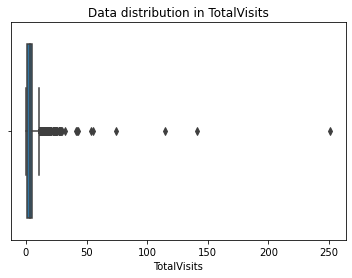

In [633]:
#Plotting the graph to see the outlier data
sns.boxplot(df_1["TotalVisits"])
plt.title('Data distribution in TotalVisits')
plt.show()

As from the figure we can see that there are few outlierrs in the data. Let's cap the outliers to the 99 percentile

In [634]:
####Capping the outliers of the "TotalVisits" variable
q4 = df_1["TotalVisits"].quantile(0.99)
df_1["TotalVisits"][df_1["TotalVisits"]>=q4] = q4

In [635]:
#describing the data after capping
df_1["TotalVisits"].describe()

count    9103.000000
mean        3.332747
std         3.252420
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max        17.000000
Name: TotalVisits, dtype: float64

In [636]:
###Replacing the null values in "TotalVisits" column by its median (since mean is more sensitive to outliers, so we can use median)
df_1["TotalVisits"].fillna(value=3,inplace=True)

In [637]:
#Checking the null values
df_1.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Converted                                           0
TotalVisits                                         0
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Specialization                                   1942
What is your current occupation                     0
What matters most to you in choosing a course       0
Tags                                                0
A free copy of Mastering The Interview              0
Last Notable Activity                               0
dtype: int64

In [638]:
# Checking the 99% value
df_1["TotalVisits"].quantile(0.99)

17.0

In [639]:
## viewing the "Total Time Spent on Website" data
df_1["Total Time Spent on Website"].describe()

count    9240.000000
mean      487.698268
std       548.021466
min         0.000000
25%        12.000000
50%       248.000000
75%       936.000000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

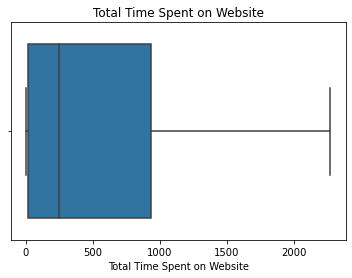

In [640]:
#Plotting the graph to check if there are any outliers in the data
sns.boxplot(df_1["Total Time Spent on Website"])
plt.title("Total Time Spent on Website")
plt.show()

The data is pretty much Normalized and we need not do any capping 

In [641]:
## viewing the "Page Views Per Visit" data 
df_1["Page Views Per Visit"].describe()

count    9103.000000
mean        2.362820
std         2.161418
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

In [642]:
# Checking the 99% value
df_1["Page Views Per Visit"].quantile(0.99)

9.0

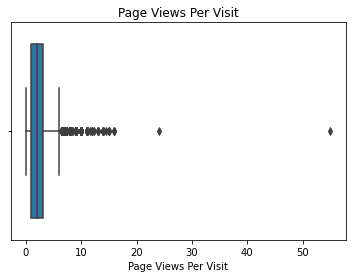

In [643]:
#Plotting the Graph 
sns.boxplot(df_1["Page Views Per Visit"])
plt.title("Page Views Per Visit")
plt.show()

As from the graph we can see that there are many outliers in the given data after the 95% IQR region. Let's cap the data in upper range to 99%

In [644]:
###Capping  the outliers in "Page Views Per Visit" column
q4 = df_1["Page Views Per Visit"].quantile(0.99)
df_1["Page Views Per Visit"][df_1["Page Views Per Visit"]>=q4] = q4


In [645]:
#Describing the data
df_1["Page Views Per Visit"].describe()

count    9103.000000
mean        2.334002
std         1.985712
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         9.000000
Name: Page Views Per Visit, dtype: float64

In [646]:
##Replacing the null values in "Page Views Per Visit" column with median
df_1["Page Views Per Visit"].fillna(value=2,inplace=True)

In [647]:
##Checking the data distribution for "Last Activity"
df_1["Last Activity"].value_counts(normalize=True)

Email Opened               0.376163
SMS Sent                   0.300427
Others                     0.146875
Olark Chat Conversation    0.106490
Page Visited on Website    0.070045
Name: Last Activity, dtype: float64

In [648]:
###Imputing the missing values in "Last Activity"
df_1["Last Activity"].fillna(value="Email Opened",inplace=True)

In [649]:
##Checking the data distribution for "Lead Source"
df_1["Lead Source"].value_counts(normalize=True)

Google            0.311604
Direct Traffic    0.276293
Olark Chat        0.190678
Organic Search    0.125380
Reference         0.058018
Others            0.038027
Name: Lead Source, dtype: float64

In [650]:
###Imputing the missing values in "Lead Source" (By its most frequent value)
df_1["Lead Source"].fillna(value="Google",inplace=True)

In [651]:
##Checking the data distribution for "What matters most to you in choosing a course"
df_1["What matters most to you in choosing a course"].value_counts(normalize=True)

Better Career Prospects    0.999675
Others                     0.000325
Name: What matters most to you in choosing a course, dtype: float64

From the above data we can see that majority of the column values are `Better Career Prospects` values, meaning that the data is skwed. Hence we can drop the column as we dont get any insights from this column

In [652]:
###Dropping "What matters most to you in choosing a course" (skewed data)
df_1.drop("What matters most to you in choosing a course",axis=1,inplace=True)

In [653]:
###Checking the null values again
df_1.isnull().sum()

Prospect ID                                  0
Lead Number                                  0
Lead Origin                                  0
Lead Source                                  0
Converted                                    0
TotalVisits                                  0
Total Time Spent on Website                  0
Page Views Per Visit                         0
Last Activity                                0
Specialization                            1942
What is your current occupation              0
Tags                                         0
A free copy of Mastering The Interview       0
Last Notable Activity                        0
dtype: int64

Seems like that except for the `Specialization` column the data is pretty much synchronized. lets filter the data in the "Specialization" column

In [654]:
#Filling the empty values with Others
df_1["Specialization"].fillna(value="Others",inplace=True)

In [655]:
# Checking the null count for the columns
df_1.isnull().sum()

Prospect ID                               0
Lead Number                               0
Lead Origin                               0
Lead Source                               0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Specialization                            0
What is your current occupation           0
Tags                                      0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

So,we dont have any null values any more in our dataframe

### Part 3 :  Converting the categorical variables into binary and dummy variables

In [656]:
##Checking the data distribution for "A free copy of Mastering The Interview"
df_1["A free copy of Mastering The Interview"].value_counts()

No     6352
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

In [657]:
## Converting the data to binary
def binary(x):
    if x=="Yes":
        return 1
    else:
        return 0

In [658]:
df_1["A free copy of Mastering The Interview"] = df_1["A free copy of Mastering The Interview"].apply(binary)

In [659]:
## Checking the columns
df_1.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'Specialization', 'What is your current occupation',
       'Tags', 'A free copy of Mastering The Interview',
       'Last Notable Activity'],
      dtype='object')

In [660]:
##Checking the data distribution for "Lead Origin"
df_1["Lead Origin"].value_counts()

Landing Page Submission    4886
API                        3580
Others                      774
Name: Lead Origin, dtype: int64


<br>

#### Part 3.1 :  Creating dummy variables

In [661]:
### "Last Notable Activity"
LNA = pd.get_dummies(df_1[["Last Notable Activity"]])
LNA1  =LNA.drop("Last Notable Activity_Others",1)
df_1 = pd.concat([df_1,LNA1],axis=1)


### "Tags"
TG = pd.get_dummies(df_1[["Tags"]])
TG_1 = TG.drop("Tags_Others",1)
df_1 = pd.concat([df_1,TG_1],axis=1)


###"What is your current occupation"
CO = pd.get_dummies(df_1[["What is your current occupation"]])
CO1 = CO.drop("What is your current occupation_Other",1)
df_1 = pd.concat([df_1,CO1],axis=1)


###"Specialization"
SP = pd.get_dummies(df_1[["Specialization"]])
SP1 = SP.drop("Specialization_Marketing Management",1)
df_1 = pd.concat([df_1,SP1],axis=1)


###"Last Activity"
LA = pd.get_dummies(df_1[["Last Activity"]])
LA1 = LA.drop("Last Activity_Page Visited on Website",1)
df_1 = pd.concat([df_1,LA1],axis=1)


###"Lead Source"
LS = pd.get_dummies(df_1[["Lead Source"]])
LS1 = LS.drop("Lead Source_Others",1)
df_1 = pd.concat([df_1,LS1],axis=1)


###"Lead Origin"
LO = pd.get_dummies(df_1[["Lead Origin"]])
LO1 = LO.drop("Lead Origin_Others",1)
df_1 = pd.concat([df_1,LO1],axis=1)

In [662]:
###Dropping the "Last Notable Activity","Tags","What is your current occupation","Specialization","Last Activity","Lead Source","Lead Origin"(Since we have created dummy for them)
New_df = df_1.drop(["Last Notable Activity","Tags","What is your current occupation","Specialization","Last Activity","Lead Source","Lead Origin"],axis=1)
New_df.head()

,Prospect ID,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Tags_Already a student,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Specialization_Finance Management,Specialization_Human Resource Management,Specialization_Others,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_SMS Sent,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Origin_API,Lead Origin_Landing Page Submission
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,0,0.0,0,0.0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,0,5.0,674,2.5,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,1,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,1,2.0,1532,2.0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,0,1.0,305,1.0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1
4,3256f628-e534-4826-9d63-4a8b88782852,660681,1,2.0,1428,1.0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1


In [663]:
####Dropping the "Prospect ID",""Lead Number"(As these are not relevant for our classification model)
New_df.drop(["Prospect ID","Lead Number"],axis=1,inplace=True)

In [664]:
#Displaying the dataframe after dropping the columns
New_df.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Tags_Already a student,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Specialization_Finance Management,Specialization_Human Resource Management,Specialization_Others,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_SMS Sent,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Origin_API,Lead Origin_Landing Page Submission
0,0,0.0,0,0.0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0
1,0,5.0,674,2.5,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,1,0
2,1,2.0,1532,2.0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1
3,0,1.0,305,1.0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1
4,1,2.0,1428,1.0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1


<br>

### Part 4 : Test-Train split

In [665]:
## Importing the libraries
from sklearn.model_selection import train_test_split

In [666]:
####"Feature" variable
X = New_df.drop("Converted",axis=1)


In [667]:
## Displaying the data
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Tags_Already a student,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Specialization_Finance Management,Specialization_Human Resource Management,Specialization_Others,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_SMS Sent,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Origin_API,Lead Origin_Landing Page Submission
0,0.0,0,0.0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0
1,5.0,674,2.5,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,1,0
2,2.0,1532,2.0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1
3,1.0,305,1.0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1
4,2.0,1428,1.0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1


In [668]:
###Target variable
y = New_df["Converted"]
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

#### Step 4.1 :  Train and Test Data

In [669]:
###Splitting the data into train-test set
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=100)

In [670]:
## Shape of the training dataset
X_train.shape

(6468, 33)

In [671]:
## Shape of the test dataset
X_test.shape

(2772, 33)

In [672]:
## Shape of the y_train dataset
y_train.shape

(6468,)

In [673]:
## Shape of the y_test dataset


y_test.shape

(2772,)

In [674]:
## Displaying the columns in X_train dataset


X_train.columns

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'A free copy of Mastering The Interview',
       'Last Notable Activity_Email Opened', 'Last Notable Activity_Modified',
       'Last Notable Activity_Page Visited on Website',
       'Last Notable Activity_SMS Sent', 'Tags_Already a student',
       'Tags_Closed by Horizzon', 'Tags_Interested in other courses',
       'Tags_Ringing', 'Tags_Will revert after reading the email',
       'Tags_switched off', 'What is your current occupation_Businessman',
       'What is your current occupation_Housewife',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Specialization_Finance Management',
       'Specialization_Human Resource Management', 'Specialization_Others',
       'Last Activity_Email Opened', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Others', 'Last Activit

In [675]:
## Displaying the test columns in the dataset

X_test.columns

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'A free copy of Mastering The Interview',
       'Last Notable Activity_Email Opened', 'Last Notable Activity_Modified',
       'Last Notable Activity_Page Visited on Website',
       'Last Notable Activity_SMS Sent', 'Tags_Already a student',
       'Tags_Closed by Horizzon', 'Tags_Interested in other courses',
       'Tags_Ringing', 'Tags_Will revert after reading the email',
       'Tags_switched off', 'What is your current occupation_Businessman',
       'What is your current occupation_Housewife',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Specialization_Finance Management',
       'Specialization_Human Resource Management', 'Specialization_Others',
       'Last Activity_Email Opened', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Others', 'Last Activit

In [676]:
## checking the null values in the new dataframe


New_df.isnull().sum()

Converted                                               0
TotalVisits                                             0
Total Time Spent on Website                             0
Page Views Per Visit                                    0
A free copy of Mastering The Interview                  0
Last Notable Activity_Email Opened                      0
Last Notable Activity_Modified                          0
Last Notable Activity_Page Visited on Website           0
Last Notable Activity_SMS Sent                          0
Tags_Already a student                                  0
Tags_Closed by Horizzon                                 0
Tags_Interested in other courses                        0
Tags_Ringing                                            0
Tags_Will revert after reading the email                0
Tags_switched off                                       0
What is your current occupation_Businessman             0
What is your current occupation_Housewife               0
What is your c

The data is pretty much clean as it does not have any null values

<br>


#### Step 4.2 :  Feature Scaling

In [677]:
## Importing the libraries
from sklearn.preprocessing import StandardScaler

In [678]:
##Instantiate and Scale the variables
scaler = StandardScaler()
X_train[["TotalVisits","Total Time Spent on Website","Page Views Per Visit"]] = scaler.fit_transform(X_train[["TotalVisits","Total Time Spent on Website","Page Views Per Visit"]])

## Displaying the columns
X_train.head()


,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Tags_Already a student,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Specialization_Finance Management,Specialization_Human Resource Management,Specialization_Others,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_SMS Sent,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Origin_API,Lead Origin_Landing Page Submission
1871,-1.022595,-0.885371,-1.180474,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0
6795,0.205373,0.005716,-0.503379,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1
3516,0.512365,-0.691418,0.092260,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0
8105,0.512365,1.365219,1.364995,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1
3934,-1.022595,-0.885371,-1.180474,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0



<br>

#### Step 4.3 :  Correlation of the data

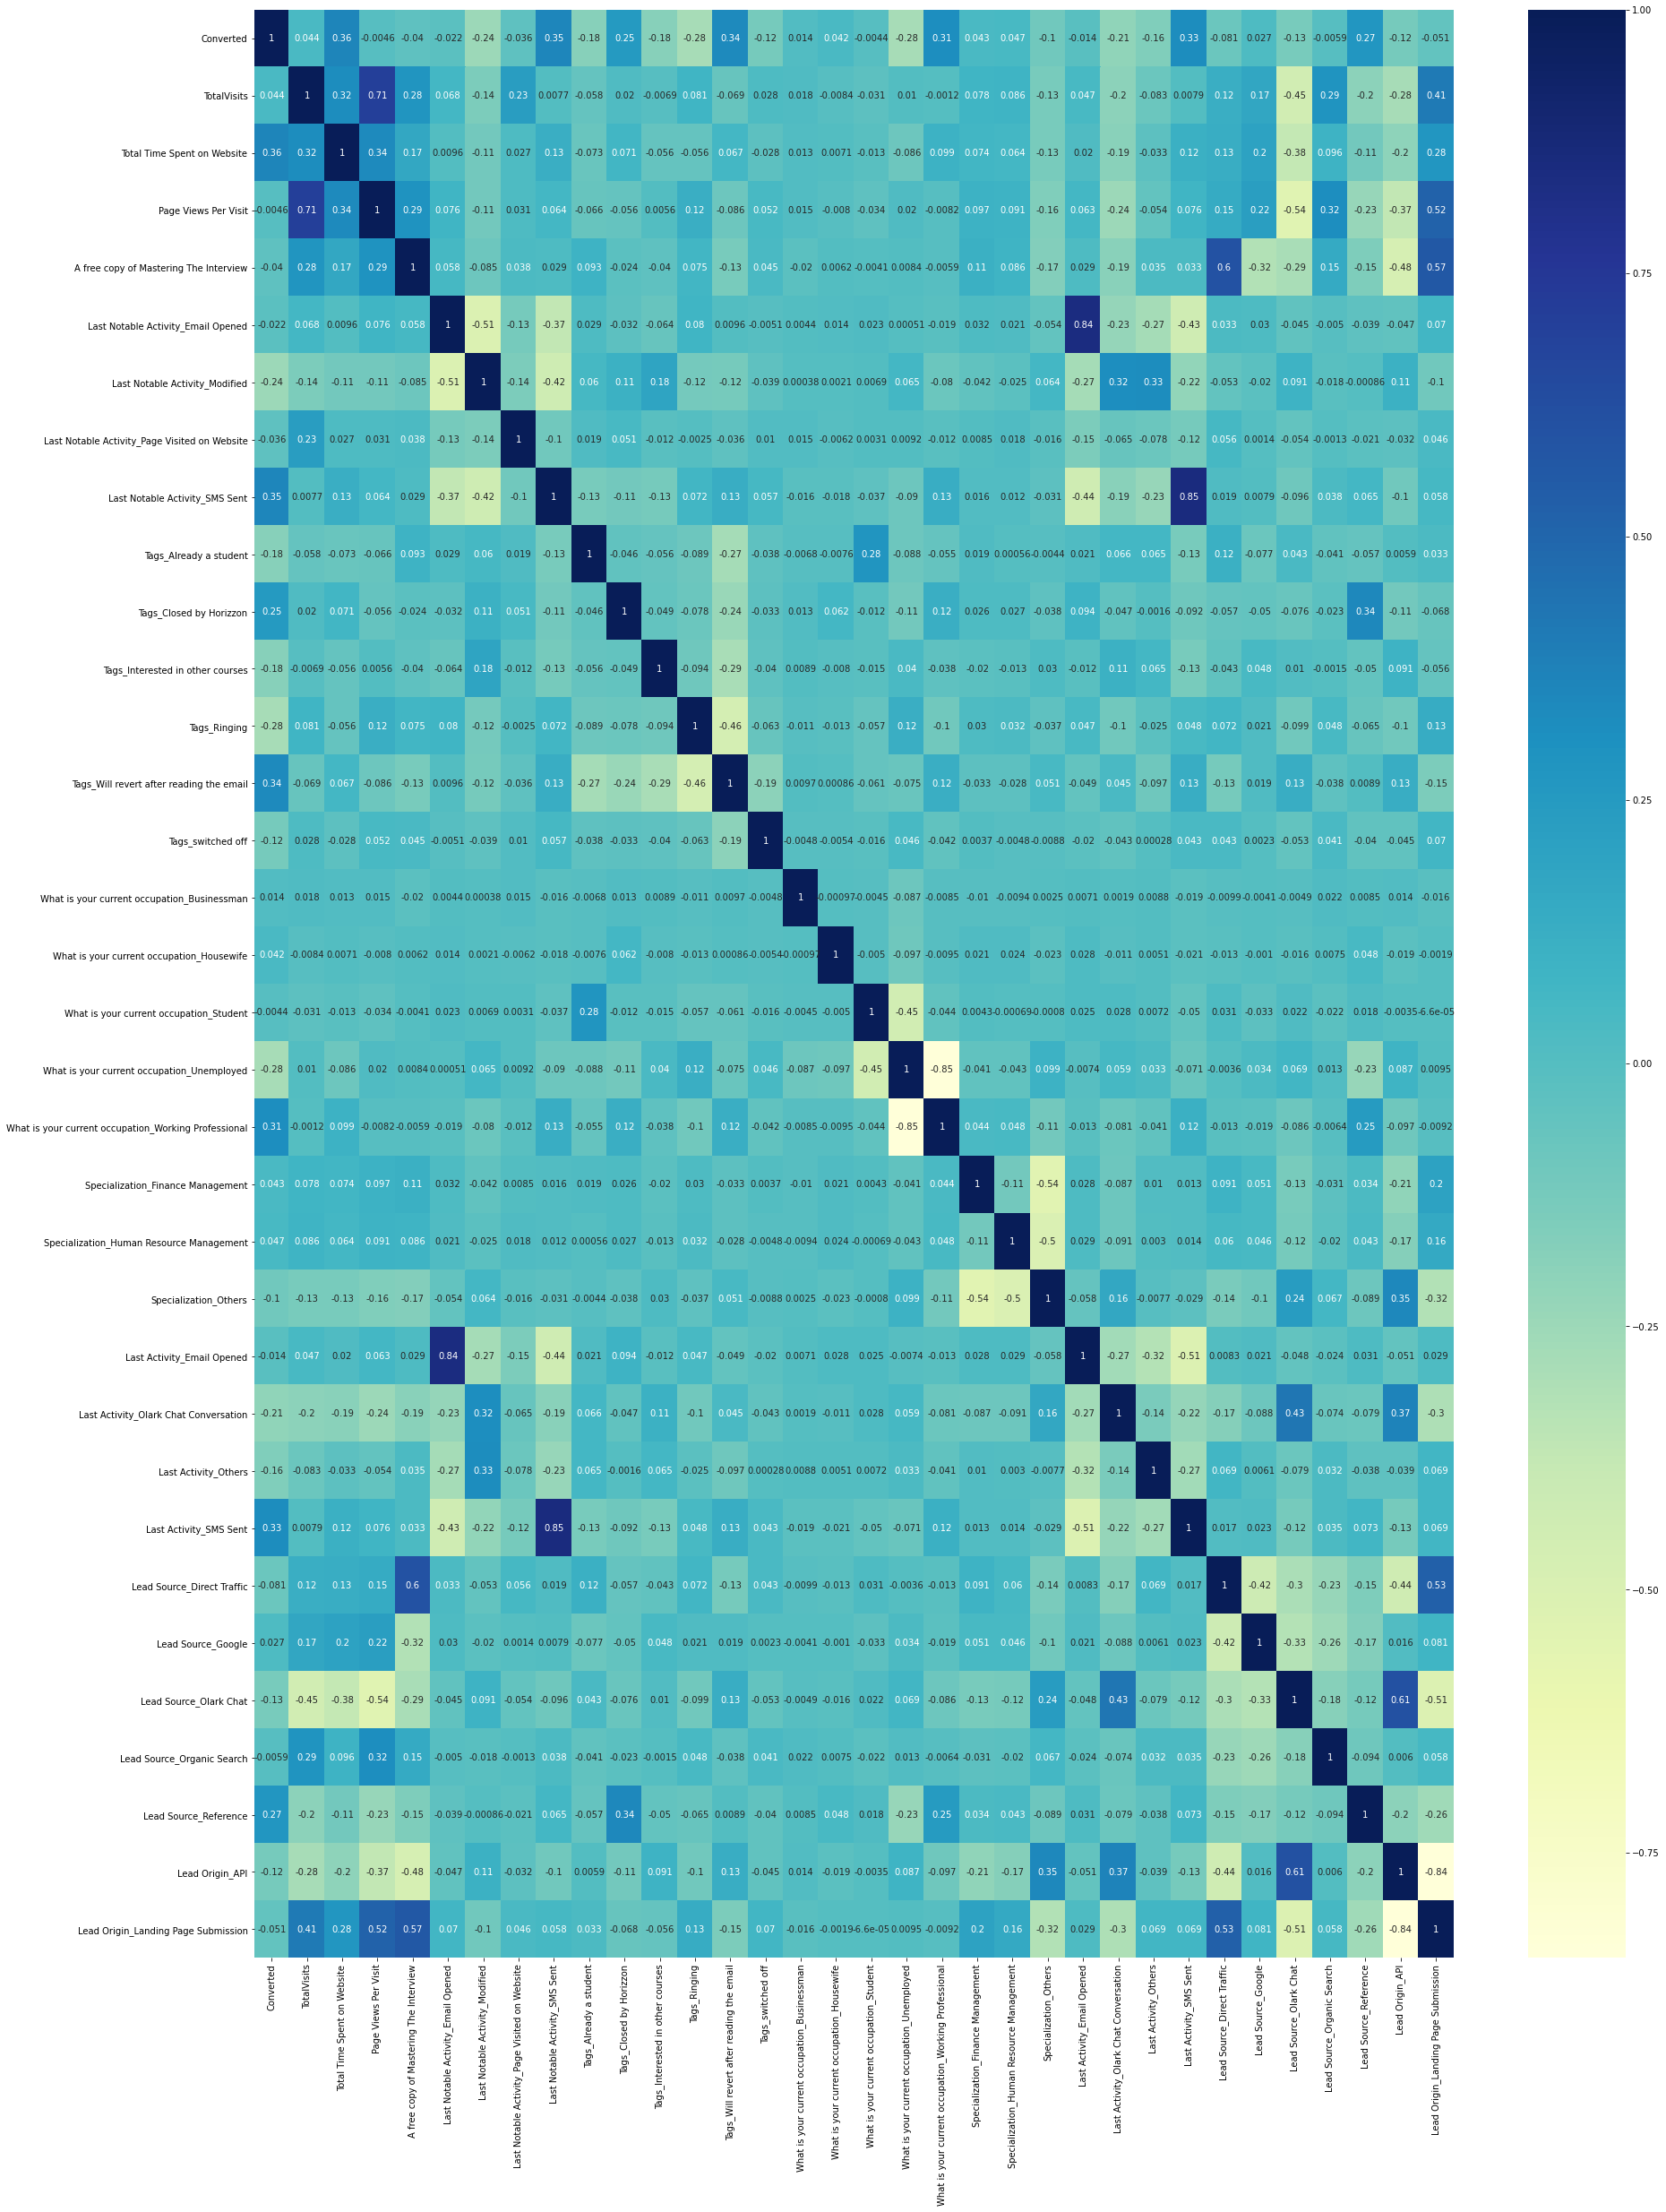

In [679]:
## Displaying the corelation matrix so that we can see the corelation between the data
plt.figure(figsize=[30,40])
sns.heatmap(New_df.corr(),annot=True,cmap="YlGnBu")
plt.show()


<br>

#### Step 4.4 :  Feature Selection using RFE

In [680]:
## Importing the required libraries
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [681]:
## Performing the RFE on the data
from sklearn.feature_selection import RFE
rfe = RFE(logreg,15)
rfe = rfe.fit(X_train,y_train)

In [682]:
rfe.support_

array([False,  True, False, False, False, False, False,  True,  True,
        True,  True,  True,  True,  True, False,  True, False,  True,
        True, False, False, False,  True, False, False,  True, False,
       False, False, False, False,  True,  True])

In [683]:
#List of columns selected randomly by the ML model
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('TotalVisits', False, 10),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 11),
 ('A free copy of Mastering The Interview', False, 19),
 ('Last Notable Activity_Email Opened', False, 8),
 ('Last Notable Activity_Modified', False, 2),
 ('Last Notable Activity_Page Visited on Website', False, 9),
 ('Last Notable Activity_SMS Sent', True, 1),
 ('Tags_Already a student', True, 1),
 ('Tags_Closed by Horizzon', True, 1),
 ('Tags_Interested in other courses', True, 1),
 ('Tags_Ringing', True, 1),
 ('Tags_Will revert after reading the email', True, 1),
 ('Tags_switched off', True, 1),
 ('What is your current occupation_Businessman', False, 7),
 ('What is your current occupation_Housewife', True, 1),
 ('What is your current occupation_Student', False, 17),
 ('What is your current occupation_Unemployed', True, 1),
 ('What is your current occupation_Working Professional', True, 1),
 ('Specialization_Finance Management', False, 13),
 ('Specialization_Human Resource Ma

In [684]:
## Assigning them to the variable col
col = X_train.columns[rfe.support_]


<br>

#### Step 4.5 :  Accessing the model with statsmodel

In [685]:
## Importing the libraries
import statsmodels.api as sm

In [686]:
X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res = logm1.fit()

In [687]:
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2003.6
Date:                Mon, 26 Oct 2020   Deviance:                       4007.1
Time:                        21:58:35   Pearson chi2:                 1.03e+04
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------


<br>

#### Step 4.5 :  Checking the VIF value

In [688]:
## Importing the libraries
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [689]:
## VIF
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,What is your current occupation_Unemployed,16.54
14,Lead Origin_Landing Page Submission,7.28
6,Tags_Will revert after reading the email,5.80
12,Last Activity_SMS Sent,5.80
13,Lead Origin_API,5.55
1,Last Notable Activity_SMS Sent,4.90
10,What is your current occupation_Working Profes...,2.34
11,Last Activity_Email Opened,2.21
5,Tags_Ringing,2.14
4,Tags_Interested in other courses,1.47


From the above we can see that the `What is your current occupation_Unemployed` has the high VIF value hence removing this column

In [690]:
## Removing the "What is your current occupation_Unemployed"
col = col.drop("What is your current occupation_Unemployed",1) ####Very high vif value
col

Index(['Total Time Spent on Website', 'Last Notable Activity_SMS Sent',
       'Tags_Already a student', 'Tags_Closed by Horizzon',
       'Tags_Interested in other courses', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'What is your current occupation_Housewife',
       'What is your current occupation_Working Professional',
       'Last Activity_Email Opened', 'Last Activity_SMS Sent',
       'Lead Origin_API', 'Lead Origin_Landing Page Submission'],
      dtype='object')

In [691]:
##building a new model
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res = logm2.fit()


In [692]:
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2010.0
Date:                Mon, 26 Oct 2020   Deviance:                       4020.0
Time:                        21:58:39   Pearson chi2:                 1.02e+04
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [693]:
###Dropping the "What is your current occupation_Housewife" (very high p_value)
col = col.drop("What is your current occupation_Housewife",1)
col

Index(['Total Time Spent on Website', 'Last Notable Activity_SMS Sent',
       'Tags_Already a student', 'Tags_Closed by Horizzon',
       'Tags_Interested in other courses', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'What is your current occupation_Working Professional',
       'Last Activity_Email Opened', 'Last Activity_SMS Sent',
       'Lead Origin_API', 'Lead Origin_Landing Page Submission'],
      dtype='object')

In [694]:
###checking the vif now
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
10,Last Activity_SMS Sent,5.60
1,Last Notable Activity_SMS Sent,4.89
6,Tags_Will revert after reading the email,4.59
12,Lead Origin_Landing Page Submission,3.75
11,Lead Origin_API,3.12
9,Last Activity_Email Opened,2.10
5,Tags_Ringing,1.93
4,Tags_Interested in other courses,1.36
2,Tags_Already a student,1.33
7,Tags_switched off,1.21


In [695]:
###Dropping "Last Activity_SMS Sent" (showing very high multicollinearity)
col = col.drop("Last Activity_SMS Sent",1)
col

Index(['Total Time Spent on Website', 'Last Notable Activity_SMS Sent',
       'Tags_Already a student', 'Tags_Closed by Horizzon',
       'Tags_Interested in other courses', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'What is your current occupation_Working Professional',
       'Last Activity_Email Opened', 'Lead Origin_API',
       'Lead Origin_Landing Page Submission'],
      dtype='object')

In [696]:
###Building another model again
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res = logm3.fit()

In [697]:
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6455
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2031.2
Date:                Mon, 26 Oct 2020   Deviance:                       4062.5
Time:                        21:58:44   Pearson chi2:                 9.98e+03
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

All the variables seems to be significant

In [698]:
###Checking the vif value again
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,Tags_Will revert after reading the email,4.48
11,Lead Origin_Landing Page Submission,3.66
10,Lead Origin_API,3.10
9,Last Activity_Email Opened,1.95
5,Tags_Ringing,1.91
1,Last Notable Activity_SMS Sent,1.74
4,Tags_Interested in other courses,1.35
2,Tags_Already a student,1.33
7,Tags_switched off,1.21
8,What is your current occupation_Working Profes...,1.18


In [699]:
###Dropping the "Tags_Will revert after reading the email" as it have nearly 4.5 VIF Value
col = col.drop("Tags_Will revert after reading the email",1)
col

Index(['Total Time Spent on Website', 'Last Notable Activity_SMS Sent',
       'Tags_Already a student', 'Tags_Closed by Horizzon',
       'Tags_Interested in other courses', 'Tags_Ringing', 'Tags_switched off',
       'What is your current occupation_Working Professional',
       'Last Activity_Email Opened', 'Lead Origin_API',
       'Lead Origin_Landing Page Submission'],
      dtype='object')

In [700]:
###rebuilding another model
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res = logm4.fit()
print(res.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6456
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2058.7
Date:                Mon, 26 Oct 2020   Deviance:                       4117.5
Time:                        21:58:46   Pearson chi2:                 1.01e+04
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [701]:
###checking for the vif again
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
10,Lead Origin_Landing Page Submission,2.12
8,Last Activity_Email Opened,1.84
1,Last Notable Activity_SMS Sent,1.59
9,Lead Origin_API,1.56
5,Tags_Ringing,1.26
7,What is your current occupation_Working Profes...,1.14
0,Total Time Spent on Website,1.11
2,Tags_Already a student,1.11
4,Tags_Interested in other courses,1.11
3,Tags_Closed by Horizzon,1.07


So we can have these final set of variables with us (low vif <3 and low p-value<0.05)

In [702]:
###Getting the predicted values on  the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[0:10]

1871    0.003144
6795    0.323596
3516    0.003851
8105    0.133819
3934    0.228535
4844    0.997252
3297    0.002347
8071    0.999894
987     0.344957
7423    0.977487
dtype: float64

In [703]:
## Reshaping the columns into matrix
y_train_pred = y_train_pred.values.reshape(-1)


In [704]:
y_train_pred[:10]

array([0.00314386, 0.32359572, 0.00385114, 0.13381893, 0.2285349 ,
       0.99725166, 0.0023474 , 0.99989433, 0.3449566 , 0.97748664])

In [705]:
y_train.values

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [706]:
y_train_pred_final = pd.DataFrame({"converted":y_train.values,"conversion_prob":y_train_pred})
y_train_pred_final["CustID"] = y_train.index
y_train_pred_final.head()

,converted,conversion_prob,CustID
0,0,0.003144,1871
1,0,0.323596,6795
2,0,0.003851,3516
3,0,0.133819,8105
4,0,0.228535,3934


In [707]:
###Creating a new column "Predicted" 1 if conversion_prob >0.5 else 0
y_train_pred_final["Predicted"] = y_train_pred_final.conversion_prob.map(lambda x:1 if x>0.5 else 0)

###Let's see the head
y_train_pred_final.head()

,converted,conversion_prob,CustID,Predicted
0,0,0.003144,1871,0
1,0,0.323596,6795,0
2,0,0.003851,3516,0
3,0,0.133819,8105,0
4,0,0.228535,3934,0



<br>

#### Step 4.6 : Checking the Confusion Matrix

In [708]:
from sklearn import metrics

In [709]:
###Confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.converted,y_train_pred_final.Predicted)
print(confusion)


[[3638  364]
 [ 469 1997]]


In [710]:
# Predicted     No    Yes
# Actual
# No             3638      364
# Yes            469      1997  

<br>

#### Accuracy Check in Confusion Matrix

In [711]:
###let's check the accuracy of the model
print(metrics.accuracy_score(y_train_pred_final.converted,y_train_pred_final.Predicted))

0.8712121212121212


So we are getting `87%` of Accuracy which is very good.

#### Step 4.7 : Metrics beyond simple accuracy

In [712]:
TP = confusion[1,1] #true positive
TN = confusion[0,0] #true negatives
FP = confusion[0,1] #false positives
FN = confusion[1,0] #false negatives

In [713]:
###Let's see the sensitivity of our model(TPR-True positive rate)
TP / float(TP+FN)

0.8098134630981346

So, we are getting almost `81%` of sensitivity (that means our model is predicting people who have converted the leads correctly). Let's check the specificity

<br>

#### Checking the Specificity in the model

In [714]:
###Specificity
TN/float(TN+FP)

0.9090454772613693

So we are getting `91%` of Specificity which is very good.

In [715]:
###FPR(1-specificity)
FP/float(TN+FP)

0.09095452273863068

#### Step 4.8 :  ROC curve

In [716]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [717]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.converted, y_train_pred_final.conversion_prob, drop_intermediate = False )

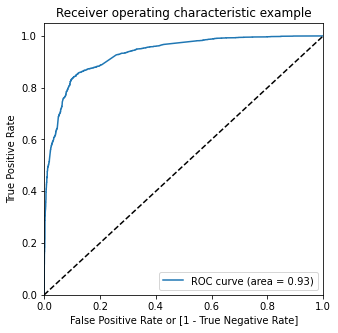

In [718]:
#drawing the curve
draw_roc(y_train_pred_final.converted, y_train_pred_final.conversion_prob)

From the above graph we can see that ROC area is `0.93` and the graph is pretty much away from the optimal curve. Hence this is a very good model.

#### Step 4.9 : Finding the optimal cutoff

In [719]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.conversion_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,converted,conversion_prob,CustID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.003144,1871,0,1,0,0,0,0,0,0,0,0,0
1,0,0.323596,6795,0,1,1,1,1,0,0,0,0,0,0
2,0,0.003851,3516,0,1,0,0,0,0,0,0,0,0,0
3,0,0.133819,8105,0,1,1,0,0,0,0,0,0,0,0
4,0,0.228535,3934,0,1,1,1,0,0,0,0,0,0,0


In [720]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.721861  0.967559  0.570465
0.2   0.2  0.800711  0.933496  0.718891
0.3   0.3  0.858534  0.867397  0.853073
0.4   0.4  0.873377  0.843066  0.892054
0.5   0.5  0.871212  0.809813  0.909045
0.6   0.6  0.864564  0.762368  0.927536
0.7   0.7  0.832096  0.626926  0.958521
0.8   0.8  0.817718  0.557989  0.977761
0.9   0.9  0.784787  0.450933  0.990505


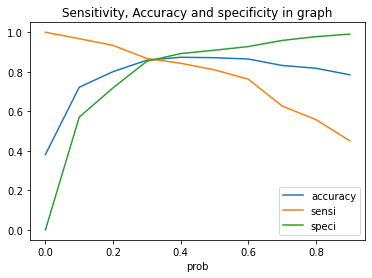

In [721]:
# Let's plot accuracy sensitivity and specificity for various probabilities.

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.title("Sensitivity, Accuracy and specificity in graph")
plt.show()

From the curve ,the optimal cutoff seems to be almost around `0.3`

In [722]:
## running model on the final prediction values
y_train_pred_final["Final_predicted"] = y_train_pred_final.conversion_prob.map(lambda x:1 if x>0.3 else 0)
y_train_pred_final.head()

,converted,conversion_prob,CustID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Final_predicted
0,0,0.003144,1871,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.323596,6795,0,1,1,1,1,0,0,0,0,0,0,1
2,0,0.003851,3516,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.133819,8105,0,1,1,0,0,0,0,0,0,0,0,0
4,0,0.228535,3934,0,1,1,1,0,0,0,0,0,0,0,0


In [723]:
##check the confusion matrix 
confusion2 = metrics.confusion_matrix(y_train_pred_final.converted,y_train_pred_final.Final_predicted)
confusion2

array([[3414,  588],
       [ 327, 2139]], dtype=int64)

In [724]:
####Let's check the overall accuracy of the model now
metrics.accuracy_score(y_train_pred_final.converted,y_train_pred_final.Final_predicted)

0.858534322820037

In [725]:
TP = confusion2[1,1]
FP = confusion2[0,1]
TN = confusion2[0,0]
FN = confusion2[1,0]

In [726]:
###Sensitivity(TPR)
TP/float(TP+FN)



0.8673965936739659

So from the training dataset we got the below values

- Sensitivity : 86.73
- Accuracy : 85.85

<br>

Now let's analyze the data on the test dataset


<br>

#### Step 4.10 : Building the model on the Test Dataset

<br> 
Here we apply the same procedure but on the test dataset.

In [727]:
#Initializing the test variables

X_test[["TotalVisits","Total Time Spent on Website","Page Views Per Visit"]] = scaler.transform(X_test[["TotalVisits","Total Time Spent on Website","Page Views Per Visit"]])

## Displaying the columns
X_test.head()


,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Tags_Already a student,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Specialization_Finance Management,Specialization_Human Resource Management,Specialization_Others,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_SMS Sent,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Origin_API,Lead Origin_Landing Page Submission
4269,1.433341,0.964504,2.892276,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0
2376,-1.022595,-0.885371,-1.180474,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0
7766,0.512365,-0.777416,1.364995,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0
9199,-1.022595,-0.885371,-1.180474,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0
4359,-1.022595,-0.885371,-1.180474,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0


<br>

Implementing the Linear Regression method

In [728]:
## Importing the required libraries
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [729]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg,15)
rfe = rfe.fit(X_test,y_test) # Fitting the data in the X_test and y_test 

In [730]:
rfe.support_

array([False,  True, False, False, False, False, False,  True,  True,
        True,  True,  True,  True,  True, False, False,  True,  True,
        True, False, False, False, False,  True, False, False, False,
       False,  True, False, False,  True,  True])

In [731]:
#List of columns selected randomly by the ML model
list(zip(X_test.columns,rfe.support_,rfe.ranking_))

[('TotalVisits', False, 14),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 13),
 ('A free copy of Mastering The Interview', False, 12),
 ('Last Notable Activity_Email Opened', False, 18),
 ('Last Notable Activity_Modified', False, 2),
 ('Last Notable Activity_Page Visited on Website', False, 16),
 ('Last Notable Activity_SMS Sent', True, 1),
 ('Tags_Already a student', True, 1),
 ('Tags_Closed by Horizzon', True, 1),
 ('Tags_Interested in other courses', True, 1),
 ('Tags_Ringing', True, 1),
 ('Tags_Will revert after reading the email', True, 1),
 ('Tags_switched off', True, 1),
 ('What is your current occupation_Businessman', False, 8),
 ('What is your current occupation_Housewife', False, 19),
 ('What is your current occupation_Student', True, 1),
 ('What is your current occupation_Unemployed', True, 1),
 ('What is your current occupation_Working Professional', True, 1),
 ('Specialization_Finance Management', False, 4),
 ('Specialization_Human Resource M

In [732]:
## Assigning them to the variable col
col = X_test.columns[rfe.support_]

In [733]:
#Applying the Linear model regression using the Binomial method

X_test_sm = sm.add_constant(X_test[col])
logm1 = sm.GLM(y_test,X_test_sm,family=sm.families.Binomial())
res = logm1.fit()

In [734]:
#Printing the data in the standard format for easy view
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 2772
Model:                            GLM   Df Residuals:                     2756
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -859.28
Date:                Mon, 26 Oct 2020   Deviance:                       1718.6
Time:                        21:59:15   Pearson chi2:                 3.09e+03
No. Iterations:                    23                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

#### Step 4.10.1 : Performing the VIF method on the data


In [735]:
## Importing the libraries

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [736]:
## VIF

vif = pd.DataFrame()
vif['Features'] = X_test[col].columns
vif['VIF'] = [variance_inflation_factor(X_test[col].values, i) for i in range(X_test[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,What is your current occupation_Unemployed,20.04
14,Lead Origin_Landing Page Submission,8.82
13,Lead Origin_API,7.71
6,Tags_Will revert after reading the email,6.14
10,What is your current occupation_Working Profes...,2.41
12,Lead Source_Olark Chat,2.41
5,Tags_Ringing,2.12
8,What is your current occupation_Student,1.64
2,Tags_Already a student,1.54
4,Tags_Interested in other courses,1.50


In [737]:
## Removing the "What is your current occupation_Unemployed" due to very High VIF value

col = col.drop("What is your current occupation_Unemployed",1)
col

Index(['Total Time Spent on Website', 'Last Notable Activity_SMS Sent',
       'Tags_Already a student', 'Tags_Closed by Horizzon',
       'Tags_Interested in other courses', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'What is your current occupation_Student',
       'What is your current occupation_Working Professional',
       'Last Activity_Olark Chat Conversation', 'Lead Source_Olark Chat',
       'Lead Origin_API', 'Lead Origin_Landing Page Submission'],
      dtype='object')

In [738]:
##building a new model

X_test_sm = sm.add_constant(X_test[col])
logm2 = sm.GLM(y_test,X_test_sm,family=sm.families.Binomial())
res = logm2.fit()


print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 2772
Model:                            GLM   Df Residuals:                     2757
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -862.91
Date:                Mon, 26 Oct 2020   Deviance:                       1725.8
Time:                        21:59:21   Pearson chi2:                 3.11e+03
No. Iterations:                    23                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [739]:
## Performing the VIF again

vif = pd.DataFrame()
vif['Features'] = X_test[col].columns
vif['VIF'] = [variance_inflation_factor(X_test[col].values, i) for i in range(X_test[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
6,Tags_Will revert after reading the email,4.28
12,Lead Origin_API,4.09
13,Lead Origin_Landing Page Submission,3.59
11,Lead Source_Olark Chat,2.39
5,Tags_Ringing,1.79
10,Last Activity_Olark Chat Conversation,1.48
1,Last Notable Activity_SMS Sent,1.43
2,Tags_Already a student,1.42
4,Tags_Interested in other courses,1.36
0,Total Time Spent on Website,1.28


In [740]:
##Dropping "Tags_switched off" Column due to its very high P Score value

col = col.drop("Tags_switched off",1)
col

Index(['Total Time Spent on Website', 'Last Notable Activity_SMS Sent',
       'Tags_Already a student', 'Tags_Closed by Horizzon',
       'Tags_Interested in other courses', 'Tags_Ringing',
       'Tags_Will revert after reading the email',
       'What is your current occupation_Student',
       'What is your current occupation_Working Professional',
       'Last Activity_Olark Chat Conversation', 'Lead Source_Olark Chat',
       'Lead Origin_API', 'Lead Origin_Landing Page Submission'],
      dtype='object')

In [741]:
###Building another model again

X_test_sm = sm.add_constant(X_test[col])
logm3 = sm.GLM(y_test,X_test_sm,family=sm.families.Binomial())
res = logm3.fit()

In [742]:
#Printing the result 

print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 2772
Model:                            GLM   Df Residuals:                     2758
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -892.36
Date:                Mon, 26 Oct 2020   Deviance:                       1784.7
Time:                        21:59:25   Pearson chi2:                 3.18e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [743]:
###Checking the vif value again

vif = pd.DataFrame()
vif['Features'] = X_test[col].columns
vif['VIF'] = [variance_inflation_factor(X_test[col].values, i) for i in range(X_test[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,Tags_Will revert after reading the email,3.92
11,Lead Origin_API,3.85
12,Lead Origin_Landing Page Submission,3.21
10,Lead Source_Olark Chat,2.39
5,Tags_Ringing,1.70
9,Last Activity_Olark Chat Conversation,1.48
1,Last Notable Activity_SMS Sent,1.42
2,Tags_Already a student,1.39
4,Tags_Interested in other courses,1.33
0,Total Time Spent on Website,1.28


In [744]:
## Dropping the "What is your current occupation_Student" column due to its high P value ~ 2.5


col = col.drop("What is your current occupation_Student",1)
col

Index(['Total Time Spent on Website', 'Last Notable Activity_SMS Sent',
       'Tags_Already a student', 'Tags_Closed by Horizzon',
       'Tags_Interested in other courses', 'Tags_Ringing',
       'Tags_Will revert after reading the email',
       'What is your current occupation_Working Professional',
       'Last Activity_Olark Chat Conversation', 'Lead Source_Olark Chat',
       'Lead Origin_API', 'Lead Origin_Landing Page Submission'],
      dtype='object')

In [745]:
## Building the model again

X_test_sm = sm.add_constant(X_test[col])
logm4 = sm.GLM(y_test,X_test_sm,family=sm.families.Binomial())
res = logm4.fit()

## Printing the result
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 2772
Model:                            GLM   Df Residuals:                     2759
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -894.98
Date:                Mon, 26 Oct 2020   Deviance:                       1790.0
Time:                        21:59:30   Pearson chi2:                 3.17e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [746]:
## Checking the VIF values on the model 4

vif = pd.DataFrame()
vif['Features'] = X_test[col].columns
vif['VIF'] = [variance_inflation_factor(X_test[col].values, i) for i in range(X_test[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
6,Tags_Will revert after reading the email,3.92
10,Lead Origin_API,3.85
11,Lead Origin_Landing Page Submission,3.20
9,Lead Source_Olark Chat,2.39
5,Tags_Ringing,1.69
8,Last Activity_Olark Chat Conversation,1.48
1,Last Notable Activity_SMS Sent,1.42
4,Tags_Interested in other courses,1.33
0,Total Time Spent on Website,1.28
2,Tags_Already a student,1.28


In [747]:
## Dropping the column "Tags_Already a student" due to its high p value ~ 0.1

col = col.drop("Tags_Already a student",1)
col

Index(['Total Time Spent on Website', 'Last Notable Activity_SMS Sent',
       'Tags_Closed by Horizzon', 'Tags_Interested in other courses',
       'Tags_Ringing', 'Tags_Will revert after reading the email',
       'What is your current occupation_Working Professional',
       'Last Activity_Olark Chat Conversation', 'Lead Source_Olark Chat',
       'Lead Origin_API', 'Lead Origin_Landing Page Submission'],
      dtype='object')

In [748]:
## Building the model again

X_test_sm = sm.add_constant(X_test[col])
logm5 = sm.GLM(y_test,X_test_sm,family=sm.families.Binomial())
res = logm5.fit()


## Printing the result
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 2772
Model:                            GLM   Df Residuals:                     2760
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -909.29
Date:                Mon, 26 Oct 2020   Deviance:                       1818.6
Time:                        21:59:32   Pearson chi2:                 3.30e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [749]:
## Checking the VIF value in the model 5


vif = pd.DataFrame()
vif['Features'] = X_test[col].columns
vif['VIF'] = [variance_inflation_factor(X_test[col].values, i) for i in range(X_test[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,Lead Origin_API,3.47
5,Tags_Will revert after reading the email,3.37
10,Lead Origin_Landing Page Submission,2.61
8,Lead Source_Olark Chat,2.39
4,Tags_Ringing,1.56
7,Last Activity_Olark Chat Conversation,1.48
1,Last Notable Activity_SMS Sent,1.41
0,Total Time Spent on Website,1.26
3,Tags_Interested in other courses,1.26
6,What is your current occupation_Working Profes...,1.14


In [750]:
###Getting the predicted values on  the test set
y_test_pred = res.predict(X_test_sm)
y_test_pred[0:10]

4269    0.923023
2376    0.974193
7766    0.696651
9199    0.016470
4359    0.807927
9186    0.822687
1631    0.561138
8963    0.199725
8007    0.220132
5324    0.625741
dtype: float64

In [509]:
## Reshaping the columns into matrix
y_test_pred = y_test_pred.values.reshape(-1)


In [510]:
y_test_pred[:10]

array([0.92302288, 0.97419325, 0.69665091, 0.01646961, 0.80792673,
       0.82268672, 0.56113807, 0.19972519, 0.22013211, 0.62574123])

In [511]:
#Converting the values into the dataframe

y_test_pred_final = pd.DataFrame({"converted":y_test.values,"conversion_prob":y_test_pred})
y_test_pred_final["CustID"] = y_test.index
y_test_pred_final.head()

,converted,conversion_prob,CustID
0,1,0.923023,4269
1,1,0.974193,2376
2,1,0.696651,7766
3,0,0.016470,9199
4,1,0.807927,4359


In [752]:
y_test_pred_final['Lead Score'] = list(map(lambda x: x*100 , y_test_pred_final['conversion_prob']))

In [754]:
y_test_pred_final.head(100)

,converted,conversion_prob,CustID,Predicted,Final_predicted,Lead Score
0,1,0.923023,4269,1,1,92.302288
1,1,0.974193,2376,1,1,97.419325
2,1,0.696651,7766,1,1,69.665091
3,0,0.016470,9199,0,0,1.646961
4,1,0.807927,4359,1,1,80.792673
...,...,...,...,...,...,...
95,1,0.218585,731,0,0,21.858539
96,1,0.974193,3444,1,1,97.419325
97,0,0.148568,5352,0,0,14.856822
98,0,0.338776,4509,0,1,33.877581


In [755]:
###Creating a new column "Predicted" 1 if conversion_prob >0.5 else 0
y_test_pred_final["Predicted"] = y_test_pred_final.conversion_prob.map(lambda x:1 if x>0.5 else 0)

###Checking the top 5 rows in the dataset
y_test_pred_final.head()

,converted,conversion_prob,CustID,Predicted,Final_predicted,Lead Score
0,1,0.923023,4269,1,1,92.302288
1,1,0.974193,2376,1,1,97.419325
2,1,0.696651,7766,1,1,69.665091
3,0,0.016470,9199,0,0,1.646961
4,1,0.807927,4359,1,1,80.792673


<br>

#### Step 4.11 : Confusion Matrix

In [756]:
## Importing the required libraries

from sklearn import metrics


## building the Confusion matrix

confusion = metrics.confusion_matrix(y_test_pred_final.converted,y_test_pred_final.Predicted)

## Printing the confusion matrix
print(confusion)


[[1531  146]
 [ 216  879]]


<br>

#### Step 4.11.1 : Checking the accuracy 

In [757]:
###let's check the accuracy of the model
print(metrics.accuracy_score(y_test_pred_final.converted,y_test_pred_final.Predicted))

0.8694083694083694


On the initial analysis we got the accuracy to be nearly `87%` which is good. Now let's check for the remaining 

<br>


In [758]:
TP = confusion[1,1] #true positive
TN = confusion[0,0] #true negatives
FP = confusion[0,1] #false positives
FN = confusion[1,0] #false negatives

<br>

#### Step 4.11.2 : Checking the sensitivity 

In [759]:
###Let's see the sensitivity of our model(TPR-True positive rate)
TP / float(TP+FN)

0.8027397260273973

On the initial analysis we got the sensitivity to be nearly `80.3%` which is good. Now let's check for the Specificity

<br>

#### Step 4.11.3 : Checking the Specificity

In [760]:
###FPR(1-specificity)

FP/float(TN+FP)

0.08706022659511031

In [761]:
###Specificity

TN/float(TN+FP)

0.9129397734048896

On the initial analysis we got the Specificity to be nearly ~ `92%` which is very good. Now lets check the data again for the cutoff model

<br>

#### Step 4.12 : Implementing the Cutoff on the given data

In [762]:
## Implementing the Cutoff on the dataset

y_test_pred_final["Final_predicted"] = y_test_pred_final.conversion_prob.map(lambda x:1 if x>0.3 else 0)
y_test_pred_final.head()

,converted,conversion_prob,CustID,Predicted,Final_predicted,Lead Score
0,1,0.923023,4269,1,1,92.302288
1,1,0.974193,2376,1,1,97.419325
2,1,0.696651,7766,1,1,69.665091
3,0,0.016470,9199,0,0,1.646961
4,1,0.807927,4359,1,1,80.792673


#### Step 4.13 : Checking the Confusion Matrix after the Cutoff value

In [763]:
##check the confusion matrix 

confusion2 = metrics.confusion_matrix(y_test_pred_final.converted,y_test_pred_final.Final_predicted)
confusion2

array([[1328,  349],
       [ 118,  977]], dtype=int64)

<br>

#### Step 4.14 : Checking the Accuracy of the model

In [764]:
####Let's check the overall accuracy of the model now
metrics.accuracy_score(y_test_pred_final.converted,y_test_pred_final.Final_predicted)

0.8315295815295816

We have got the Accuracy of the model to be ~ `83%` which is very good. now lets check the sensitivity of the model

<br>

#### Step 4.15 : Checking the Sensitivity of the model

In [765]:
TP = confusion2[1,1]
FP = confusion2[0,1]
TN = confusion2[0,0]
FN = confusion2[1,0]

In [766]:
###Sensitivity(TPR)
TP/float(TP+FN)

0.8922374429223744

After implementing the cutoff data, we have got the Sensitivity to be ~ `89%` which is very good as the model is predicting the leads correctly. Now let's check the Specificity in the model 

In [767]:
###Specificity
TN/float(TN+FP)

0.7918902802623733

So as per the final data we get the accuracy and the senstivity of the final 

- Accuracy : 83
- Sensitivity : 89
- Specificity : 79.2